# Normality Checking using Normality Class

In [1]:
import sys
sys.path.append('../')
from CommonFuncs.Normality import Normality
from CommonFuncs.CommonFunctions import Binning 
norm = Normality()
binning = Binning()

In [9]:
import scipy.stats
import numpy as np
np.random.seed(seed=1000)
data = scipy.stats.norm.rvs(loc=5, scale=3, size=1000)
data[:10]

array([2.58662509, 5.96279464, 4.92355136, 6.93297149, 4.09760998,
       6.16842366, 4.67768809, 3.56005077, 6.78510651, 3.60599742])

Mean is  4.968639841536935
Median is  4.930343607500564
Mode is  ModeResult(mode=array([-4.5213401]), count=array([1]))
Kurtosis is  -0.010053741110466419
Skew is  -0.06889975214740607
P-value from the Shapiro Wilks Test is  0.6838732957839966
P-value from the D'Agostino's Test is  0.6691927280838004
Result from Anderson-Darling Test is  AndersonResult(statistic=0.2018675086762869, critical_values=array([0.574, 0.653, 0.784, 0.914, 1.088]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Result from Kolmogorov-Smirnov Test is  KstestResult(statistic=0.014931243152937479, pvalue=0.9790238223066676)


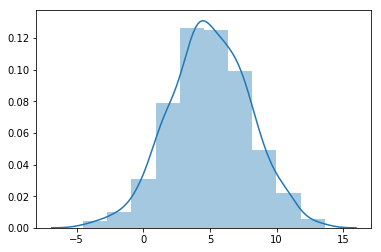

<Figure size 432x288 with 0 Axes>

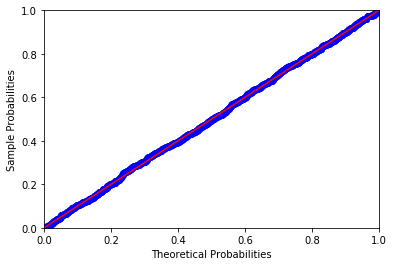

<Figure size 432x288 with 0 Axes>

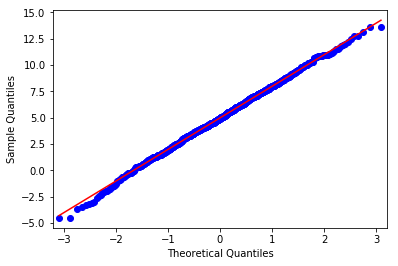

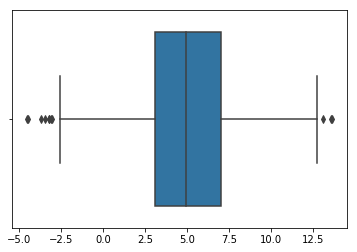

In [10]:
norm.check_normality(data)

In [11]:
c = 1.64
n_mann = binning.mann_wald_test(data,c)
print("Number of bins as per Mann and Wald Test comes to ",str(n_mann) ," for c=1.64")
n_struges = binning.struges(data)
print("Number of bins as per Struges Test comes to ",str(n_struges) ," for c=1.64")

Number of bins as per Mann and Wald Test comes to  59  for c=1.64
Number of bins as per Struges Test comes to  10  for c=1.64


In [12]:
# We can use either Mann and Wald number of Bins or Struges. Here we use Struges
chi_sq_val,chi_table = norm.chi_sq_normality_test(data,n_struges)
chi_table

,Bin_id,Lower_bin_val,Upper_bin_val,Observed_freq,Expected_freq,(Obs-Exp)^2/Exp
0,0,-4.521340,-2.707844,8,4.472081,2.783091
1,1,-2.707844,-0.894348,18,20.081596,0.215772
2,2,-0.894348,0.919148,56,63.206301,0.821608
3,3,0.919148,2.732644,143,139.500569,0.087785
4,4,2.732644,4.546140,229,215.961452,0.787195
5,5,4.546140,6.359636,227,234.550410,0.243055
6,6,6.359636,8.173132,180,178.718803,0.009185
7,7,8.173132,9.986628,89,95.528126,0.446114
8,8,9.986628,11.800124,40,35.810751,0.490071
9,9,11.800124,13.613620,10,9.411492,0.036800


The chi-square statistic from the table comes to 

In [84]:
chi_sq_val

2.0077775343001325

The degree of freedom will become n-1-k. Since both mean and standard deviation were estimated from it, the degree of freedom becomes df = 10-1-2 = 7

In [7]:
df = n_struges-2-1
chi_sq_critical = scipy.stats.chi2.isf(0.05,df)
print("The chi-square statistic calculated from this table comes to",str(chi_sq_val))
print("The chi-square critical value for degrees of freedom = {0} and alpha = 0.05 comes to {1}".format(str(df),str(chi_sq_critical)))    

The chi-square statistic calculated from this table comes to 10.714114828574129
The chi-square critical value for degrees of freedom = 7 and alpha = 0.05 comes to 14.067140449340167


In the table above, we can see that the expected frequencies in some cells are less that 5. We now, can combine these bins where the expected values fall below what is required. First lets combine the 0 and 1 bins

In [13]:
chi_table_bins = chi_table[['Lower_bin_val','Upper_bin_val']]
bin_val = norm.combine_bins(-4.521340,-0.894348,chi_table_bins)
bin_val

,Lower_bin_val,Upper_bin_val
0,-4.521340,-0.894348
2,-0.894348,0.919148
3,0.919148,2.732644
4,2.732644,4.546140
5,4.546140,6.359636
6,6.359636,8.173132
7,8.173132,9.986628
8,9.986628,11.800124
9,11.800124,13.613620


Using these new bins, we will run our chi-square table again. Note that the bin_vals have to be given in this format.[(bin_1_low,bin_1_high),(bin_2_low,bin_2_high)...]

In [14]:
new_bins = list(zip(bin_val['Lower_bin_val'],bin_val['Upper_bin_val']))
new_bins

[(-4.52134, -0.894348),
 (-0.8943480802009738, 0.9191479294443496),
 (0.9191479294443496, 2.732643939089673),
 (2.732643939089673, 4.5461399487349965),
 (4.5461399487349965, 6.35963595838032),
 (6.35963595838032, 8.173131968025643),
 (8.173131968025643, 9.986627977670967),
 (9.986627977670967, 11.80012398731629),
 (11.80012398731629, 13.613619996961614)]

In [15]:
chi_sq_val,chi_table = norm.chi_sq_normality_test(data,len(new_bins),new_bins)
chi_table

,Bin_id,Lower_bin_val,Upper_bin_val,Observed_freq,Expected_freq,(Obs-Exp)^2/Exp
0,0,-4.521340,-0.894348,25,24.553679,0.008113
1,1,-0.894348,0.919148,56,63.206301,0.821608
2,2,0.919148,2.732644,143,139.500569,0.087785
3,3,2.732644,4.546140,229,215.961452,0.787195
4,4,4.546140,6.359636,227,234.550410,0.243055
5,5,6.359636,8.173132,180,178.718803,0.009185
6,6,8.173132,9.986628,89,95.528126,0.446114
7,7,9.986628,11.800124,40,35.810751,0.490071
8,8,11.800124,13.613620,10,9.411492,0.036800


Now we see that there are no cells with expected frequencies less than 5.
Lets now go ahead and get the chi-square statistic and compare it with critical values.

In [16]:
df = len(new_bins)-2-1
chi_sq_critical = scipy.stats.chi2.isf(0.05,df)
print("The chi-square statistic calculated from this table comes to",str(chi_sq_val))
print("The chi-square critical value for degrees of freedom = {0} and alpha = 0.05 comes to {1}".format(str(df),str(chi_sq_critical)))    

The chi-square statistic calculated from this table comes to 2.929924566730774
The chi-square critical value for degrees of freedom = 6 and alpha = 0.05 comes to 12.59158724374398


### Drawing inferences from normality tests

As we can see the output of the tests, we see all the plots show a good amount of normality.
The median and the mean correspond which indicates a symmetric distribution. Mode however,does not. If the n is increased, that too will correspond.
<br>
<br>
Both Kurtosis and Skew are very minimal, indicating a normal distribution.However, they alone might not be sufficient to infer normality.
<br>
<br>
All the tests give a statically insignificant result other than Kolmogorov-Smirnov. 
<br>
<br>
When doing normality tests, its important to look at variety of parameters and statistics before saying the data is normal or not-normal. Also the question to be asked is whether the data is 'not-normal' enough, for a test not to be carried out.
<br>
<br>
Some interesting reads are given below
<br>
https://stats.stackexchange.com/questions/2492/is-normality-testing-essentially-useless
https://www.researchgate.net/post/How_do_we_know_which_test_to_apply_for_testing_normality
https://www.graphpad.com/guides/prism/7/statistics/index.htm?stat_choosing_a_normality_test.htm